<a href="https://colab.research.google.com/github/machinelurnun/machinelurnun/blob/main/SQL_for_Epidemiology_Donovan_Brown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align="center">
    NSDC Data Science Capsule Projects
</h1>

<h2 align="center">
    Project: SQL Basics for Epidemiological Research
</h2>

<h3 align="center">
    Name: (Donovan Brown)
</h3>


### **Please read before you begin your project**

This notebook will guide you through the process of analyzing a COVID-19 dataset using SQL queries in Python.

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "SQL for Epidemiology - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

The notebook is provided with blanks "_________" and a comment instructing you on what needs to be done. You need to fill the space with the correct code to make sure you get the desired output.

You can now start working on the project. :)

**Project Description:**

To work with the Covid-19 dataset in this project, you'll need to create and connect to an SQLite database as seen in the steps within this notebook.

**Key Features**

- Practical SQL exercises with step-by-step instructions.
- Real-world datasets for hands-on experience.
- Comprehensive explanations of SQL queries and concepts.
- Interactive coding examples and challenges.

**Dataset**
Our World in Data COVID-19 Dataset: This dataset provides comprehensive data on COVID-19 cases, deaths, testing, and vaccination worldwide.
- You can find the dataset on Kaggle: [Kaggle Link](https://www.kaggle.com/datasets/bolkonsky/covid19)
- Download the dataset from the provided link and save it as 'covid19.csv' on your computer.
- On Google Colab, click on the "Upload" button and select the 'covid19.csv' file from your local computer.

## Introduction
This SQL project is designed for beginners who want to practice writing SQL queries using a real-world dataset. In this project, we will work with the Covid-19 dataset. The main goal is to help you become familiar with SQL syntax and basic data analysis tasks. Make sure to complete the code where there is a 'TODO' sign. Hints are provided along the way.

## Table of Contents
1. [Libraries and Database Setup](#libraries-and-database-setup)
2. [Loading the Dataset](#loading-the-dataset)
3. [Basic SQL Queries](#basic-sql-queries)
4. [Filtering Data](#filtering-data)
5. [Aggregating Data](#aggregating-data)
6. [Grouping Data](#grouping-data)
7. [Sorting Data](#sorting-data)
8. [Joining Tables](#joining-tables)
9. [Subqueries](#subqueries)
10. [Window Functions](#window-functions)
11. [Data Analysis and Visualization](#data-analysis-and-visualization)
12. [Closing Connection](#closing-connection)
13. [Summary of Basic SQL Commands](#summary-of-basic-sql-commands)


## Milestone 1: Importing Libraries and Dataset
In this milestone, we will import the necessary libraries and load the COVID-19 dataset into a pandas DataFrame.

In [ ]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/covid19.csv')  # Update with the correct local path

# Display the first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Milestone 2: Setting Up SQLite Database
Here, we will create an SQLite database and import the DataFrame into an SQL table.

In [ ]:
# Create a connection to SQLite database
conn = sqlite3.connect('covid19.db')
cursor = conn.cursor()

# Convert DataFrame to SQL
df.to_sql('covid19_data', conn, if_exists='replace', index=False)

429435

## Milestone 3: Basic SQL Queries
In this milestone, we will perform some basic SQL queries to select columns and rows from the table.

In [ ]:
# Write a query to generate all columns and limit the rows to 10
query_1 = "SELECT * FROM covid19_data LIMIT 10;"

# Write a query to select 'location', 'total_cases', and 'total_deaths' columns from the 'covid19_data' table and limit the result to 10 rows.
query_2 = "SELECT location, total_cases, total_deaths FROM covid19_data LIMIT 10;"

# Execute the queries
result_1 = pd.read_sql_query(query_1, conn)
result_2 = pd.read_sql_query(query_2, conn)

# Display results
print(result_1)
print(result_2)

# Write a query to select 'location', 'total_cases', and 'total_deaths' columns from the 'covid19_data' table and limit the result to 10 rows.
query_2 = "SELECT location, total_cases, total_deaths FROM covid19_data LIMIT 10;"

# Execute the queries
result_1 = pd.read_sql_query(query_1, conn)
result_2 = pd.read_sql_query(query_2, conn)

# Display results
print(result_1)
print(result_2)

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          0.0        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          0.0        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          0.0        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          0.0        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0       

## Milestone 4: Filtering Data
We will use the `WHERE` clause and logical operators to filter data based on specific conditions.

In [ ]:
# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and limit the result to 10 rows.
query_3 = "SELECT * FROM covid19_data WHERE location = 'United States' LIMIT 10;"

# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and 'new_cases' are greater than 10,000.
query_4 = "SELECT * FROM covid19_data WHERE location = 'United States' AND new_cases > 10000;"

# Execute the queries
result_3 = pd.read_sql_query(query_3, conn)
result_4 = pd.read_sql_query(query_4, conn)

# Display results
print(result_3)
print(result_4)

  iso_code      continent       location        date  total_cases  new_cases  \
0      USA  North America  United States  2020-01-05          0.0        0.0   
1      USA  North America  United States  2020-01-06          0.0        0.0   
2      USA  North America  United States  2020-01-07          0.0        0.0   
3      USA  North America  United States  2020-01-08          0.0        0.0   
4      USA  North America  United States  2020-01-09          0.0        0.0   
5      USA  North America  United States  2020-01-10          0.0        0.0   
6      USA  North America  United States  2020-01-11          0.0        0.0   
7      USA  North America  United States  2020-01-12          0.0        0.0   
8      USA  North America  United States  2020-01-13          0.0        0.0   
9      USA  North America  United States  2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0       

## Milestone 5: Aggregating Data
Next, we will use aggregate functions like `COUNT`, `SUM`, `AVG`, `MIN`, and `MAX` to summarize data.

In [ ]:
# Using COUNT, SUM, AVG, MIN, MAX
# Write a query to count the total number of records in the 'covid19_data' table.
query_5 = "SELECT COUNT(*) FROM covid19_data;"

# Write a query to calculate the sum of 'total_cases' in the 'covid19_data' table.
query_6 = "SELECT SUM(total_cases) FROM covid19_data;"

# Write a query to calculate the average of 'new_cases' in the 'covid19_data' table.
query_7 = "SELECT AVG(new_cases) FROM covid19_data;"

# Write a query to find the minimum value of 'total_deaths' in the 'covid19_data' table.
query_8 = "SELECT MIN(total_deaths) FROM covid19_data;"

# Write a query to find the maximum value of 'total_deaths' in the 'covid19_data' table.
query_9 = "SELECT MAX(total_deaths) FROM covid19_data;"

# Execute the queries
result_5 = pd.read_sql_query(query_5, conn)
result_6 = pd.read_sql_query(query_6, conn)
result_7 = pd.read_sql_query(query_7, conn)
result_8 = pd.read_sql_query(query_8, conn)
result_9 = pd.read_sql_query(query_9, conn)

# Display results
print(result_5)
print(result_6)
print(result_7)
print(result_8)
print(result_9)

   COUNT(*)
0    429435
   SUM(total_cases)
0      3.033057e+12
   AVG(new_cases)
0     8017.359934
   MIN(total_deaths)
0                0.0
   MAX(total_deaths)
0          7057132.0


## Milestone 6: Grouping Data
We will use the `GROUP BY` clause to group data and the `HAVING` clause to filter groups.

In [ ]:
# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping the data by location.
query_10 = "SELECT AVG(new_cases) FROM covid19_data GROUP BY location";


# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping by location, and filtering the groups to only include those with an average of new cases greater than 1,000.
query_11 = "SELECT AVG(new_cases) FROM covid19_data GROUP BY location HAVING AVG(new_cases) > 1000;"

# Execute the queries
result_10 = pd.read_sql_query(query_10, conn)
result_11 = pd.read_sql_query(query_11, conn)

# Display results
print(result_10)
print(result_11)

     AVG(new_cases)
0        140.510155
1       7853.543011
2        200.147551
3        162.568100
4          4.993429
..              ...
250             NaN
251   463521.539427
252        7.135603
253      208.985663
254      159.227137

[255 rows x 1 columns]
    AVG(new_cases)
0      7853.543011
1      6034.180406
2    180145.866189
3      7085.520311
4      3633.479092
..             ...
57    14919.133214
58    83958.465097
59   150391.950418
60     6943.847073
61   463521.539427

[62 rows x 1 columns]


## Milestone 7: Sorting Data
In this milestone, we will use the `ORDER BY` clause to sort data based on specific columns.

In [ ]:
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table, ordering the results by 'total_cases' in descending order and limiting the output to the top 10 rows.
query_12 = "SELECT location, total_cases FROM covid19_data ORDER BY total_cases DESC LIMIT 10;"

# Execute the query
result_12 = pd.read_sql_query(query_12, conn)

# Display result
print(result_12)

  location  total_cases
0    World  775866783.0
1    World  775819614.0
2    World  775819614.0
3    World  775819614.0
4    World  775819614.0
5    World  775819614.0
6    World  775819614.0
7    World  775819614.0
8    World  775763598.0
9    World  775763598.0


## Milestone 8: SQL Joins - Combining Tables
In this milestone, we will perform an `INNER JOIN` to combine rows from two or more tables based on a related column.

To better understand SQL Joins and the different types of Joins, check out this [resource by W3Schools](https://www.w3schools.com/sql/sql_join.asp). Then begin the section below.


In [ ]:
# Assuming another table 'vaccination_data' exists
# Create a sample vaccination_data table
vaccination_data = {
    'location': ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom'],
    'total_vaccinations': [300000000, 250000000, 200000000, 150000000, 100000000]
}
vaccination_df = pd.DataFrame(vaccination_data)
vaccination_df.to_sql('vaccination_data', conn, if_exists='replace', index=False)

# Write a query to join 'covid19_data' and 'vaccination_data' tables, selecting 'location', 'total_cases', and 'total_vaccinations', using an INNER JOIN on the 'location' column.
query_13 = "SELECT c.location, c.total_cases, v.total_vaccinations FROM covid19_data AS c INNER JOIN vaccination_data AS v ON c.location = v.location;"

# Execute the query
result_13 = pd.read_sql_query(query_13, conn)

# Display result
print(result_13)

           location  total_cases  total_vaccinations
0            Brazil          0.0           200000000
1            Brazil          0.0           200000000
2            Brazil          0.0           200000000
3            Brazil          0.0           200000000
4            Brazil          0.0           200000000
...             ...          ...                 ...
8373  United States  103436829.0           300000000
8374  United States  103436829.0           300000000
8375  United States  103436829.0           300000000
8376  United States  103436829.0           300000000
8377  United States  103436829.0           300000000

[8378 rows x 3 columns]


## Milestone 9: Subqueries
We will use subqueries in the `SELECT` clause to further refine our data.

In [ ]:
# Using subquery in SELECT
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table and include the average of 'total_cases' as a subquery.

query_14 = "SELECT location, total_cases, (SELECT AVG(total_cases) FROM covid19_data) as avg_total_cases FROM covid19_data;"


# Execute the query
result_14 = pd.read_sql_query(query_14, conn)

# Display result
print(result_14)

           location  total_cases  avg_total_cases
0       Afghanistan          0.0     7.365292e+06
1       Afghanistan          0.0     7.365292e+06
2       Afghanistan          0.0     7.365292e+06
3       Afghanistan          0.0     7.365292e+06
4       Afghanistan          0.0     7.365292e+06
...             ...          ...              ...
429430     Zimbabwe     266386.0     7.365292e+06
429431     Zimbabwe     266386.0     7.365292e+06
429432     Zimbabwe     266386.0     7.365292e+06
429433     Zimbabwe     266386.0     7.365292e+06
429434     Zimbabwe     266386.0     7.365292e+06

[429435 rows x 3 columns]


## Milestone 10: Window Functions
We will use window functions like `ROW_NUMBER()`, `RANK()`, `DENSE_RANK()`, `NTILE()`, `LEAD()`, `LAG()` to perform operations across a set of table rows.

In [ ]:
# Using ROW_NUMBER(), RANK(), DENSE_RANK(), NTILE(), LEAD(), LAG()
# Write a query to select 'location', 'date', and 'new_cases' from the 'covid19_data' table. Use ROW_NUMBER(), RANK(), and DENSE_RANK() functions, partitioned by 'location', and ordered by 'date' and 'new_cases' respectively.
query_15 = "SELECT location, date, new_cases, ROW_NUMBER() OVER(PARTITION BY location ORDER BY date, new_cases) as row_num, RANK() OVER(PARTITION BY location ORDER BY date, new_cases DESC) as rank, DENSE_RANK() OVER(PARTITION BY location ORDER BY date, new_cases DESC) as dense_rank FROM covid19_data;"

# Execute the query
result_15 = pd.read_sql_query(query_15, conn)

# Display result
print(result_15)

           location        date  new_cases  row_num  rank  dense_rank
0       Afghanistan  2020-01-05        0.0        1     1           1
1       Afghanistan  2020-01-06        0.0        2     2           2
2       Afghanistan  2020-01-07        0.0        3     3           3
3       Afghanistan  2020-01-08        0.0        4     4           4
4       Afghanistan  2020-01-09        0.0        5     5           5
...             ...         ...        ...      ...   ...         ...
429430     Zimbabwe  2024-07-31        0.0     1670  1670        1670
429431     Zimbabwe  2024-08-01        0.0     1671  1671        1671
429432     Zimbabwe  2024-08-02        0.0     1672  1672        1672
429433     Zimbabwe  2024-08-03        0.0     1673  1673        1673
429434     Zimbabwe  2024-08-04        0.0     1674  1674        1674

[429435 rows x 6 columns]


## Milestone 11: Data Analysis and Visualization
In this final milestone, we will use SQL queries to extract data for analysis and create visualizations using `matplotlib`.

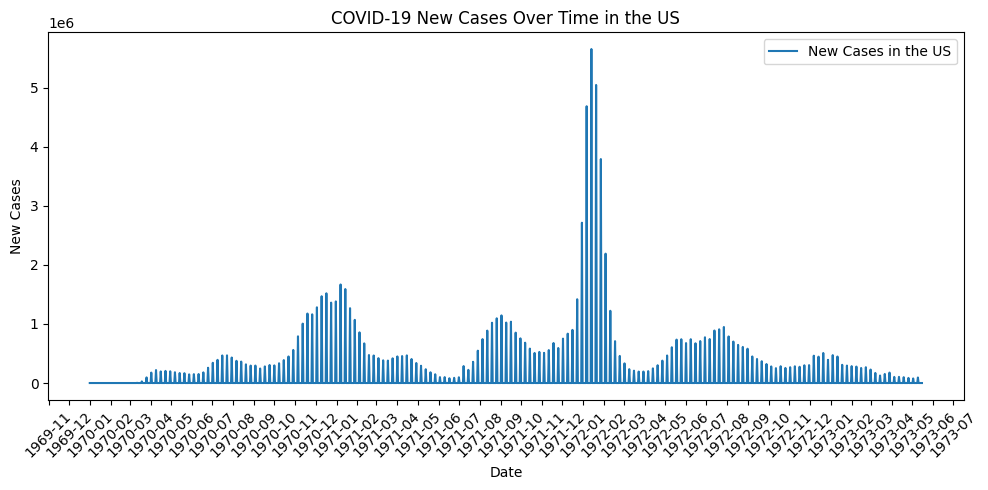

In [ ]:
# Write a query to select 'date' and 'new_cases' from the 'covid19_data' table for records where the 'location' is 'United States'.
query_16 = "SELECT date, new_cases FROM covid19_data WHERE location ='United States';"

us_data = pd.read_sql_query(query_16, conn)


# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(us_data['date'], us_data['new_cases'], label='New Cases in the US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 New Cases Over Time in the US')
plt.legend()

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Final Submission**
Thank you for completing the project!
Please submit all materials to the NSDC HQ team at er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.